In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Importing the datasets
trans_data = pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="Transaction_Data")
Cust_details_data = pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="Customer_details")
Prof_data= pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="Profession_Code")
Ed_level_name_data= pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="Education_Level_name")
Month_name_data= pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="Month_name")
Prod_cat_name_data= pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="prod_cat_name")
Prod_subcat_name_data = pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="prod_subcat_name")
City_name= pd.read_excel(r"C:\Users\Hp\Desktop\need\python\fresco_case\Fresco - Large Retailer - Predict Returns.xlsx",sheet_name="City_name")

In [4]:
# Renaming columns for merging dataframes

Ed_level_name_data.rename(columns={'Education_Level_Code': 'Education_code'}, inplace=True)

Prof_data.rename(columns={'Profession': 'Profession_Code'}, inplace=True)

Prod_subcat_name_data.rename(columns={'Code': 'prod_subcat_code'}, inplace=True)

Prod_cat_name_data.rename(columns={'Code': 'prod_cat_code'}, inplace=True)

Month_name_data.rename(columns={'Code': 'Month_code'}, inplace=True)

City_name.rename(columns={'City_Code': 'city_code'}, inplace=True)

In [5]:
# Merging all the datasets on common columns
data = pd.merge(Cust_details_data,Ed_level_name_data, on = 'Education_code', how = 'left')
data = pd.merge(data,Prof_data, on = 'Profession_Code', how = 'left')
data = pd.merge(trans_data, data, on = 'CustID', how = 'left')
data = pd.merge(data,Prod_subcat_name_data, on = 'prod_subcat_code', how = 'left')
data = pd.merge(data,Prod_cat_name_data, on = 'prod_cat_code', how = 'left')
data = pd.merge(data, Month_name_data, on = 'Month_code', how = 'left')
data = pd.merge(data, City_name, on = 'city_code', how = 'left')

In [6]:
# A look at the final dataset
data.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Gender,Marital_status,Education_code,Profession_Code,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,...,M,0,4,3,PhD,Others,Fiction,Books,January,Hyderabad
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,...,M,1,3,2,Master,Salaried,Women,Clothing,January,Bangalore
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,...,M,1,1,2,Basic,Salaried,Bath,Home and kitchen,January,Kolkata
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,...,M,1,5,3,Others,Others,Mens,Footwear,January,Hyderabad
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,...,M,0,1,3,Basic,Others,Women,Clothing,January,New Delhi


In [7]:
# eliminating duplicates and garbage columns
data = data.drop(columns = ["transaction_id","Month_code","prod_cat_code","prod_subcat_code","CustID","city_code","DOB","Marital_status","Education_code","Profession_Code"])

In [8]:
### Basic EDA
print(data.columns) ## checking column names

Index(['Qty', 'Rate', 'Amount', 'Tax', 'Delivery_chrgs', 'Payment_mode',
       'Store_type', 'Reviews', 'Income', 'Return', 'Gender',
       'Level_Education', 'Type', 'prod_subcat', 'prod_cat', 'Month_name',
       'City_Code_Name'],
      dtype='object')


In [11]:
# General info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19597 entries, 0 to 19596
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Qty              19597 non-null  int64  
 1   Rate             19597 non-null  int64  
 2   Amount           19597 non-null  int64  
 3   Tax              19597 non-null  float64
 4   Delivery_chrgs   19597 non-null  float64
 5   Payment_mode     19597 non-null  object 
 6   Store_type       19597 non-null  object 
 7   Reviews          19597 non-null  float64
 8   Income           19597 non-null  float64
 9   Return           19597 non-null  bool   
 10  Gender           19597 non-null  object 
 11  Level_Education  19597 non-null  object 
 12  Type             19597 non-null  object 
 13  prod_subcat      19597 non-null  object 
 14  prod_cat         19597 non-null  object 
 15  Month_name       19597 non-null  object 
 16  City_Code_Name   19597 non-null  object 
dtypes: bool(1), 

In [9]:
# Statistical description of all continuous variables 
data.describe()

,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,Income
count,19597.000000,19597.000000,19597.00000,19597.000000,10707.000000,19546.000000,19554.000000
mean,3.098178,777.154718,2302.11563,241.722141,119.156627,3.882329,70539.063977
std,1.445638,414.308709,1742.62635,182.975767,74.670135,1.414998,37428.491760
min,1.000000,70.000000,70.00000,7.350000,0.000000,1.000000,7157.000000
25%,2.000000,418.000000,915.00000,96.075000,50.000000,3.000000,37962.000000
50%,3.000000,775.000000,1826.00000,191.730000,90.000000,4.000000,69316.000000
75%,4.000000,1136.000000,3348.00000,351.540000,200.000000,5.000000,99548.000000
max,5.000000,1500.000000,7500.00000,787.500000,250.000000,5.000000,159984.000000


In [10]:
# Statistical description of all categorical variables 
data.describe(include='O')

,Payment_mode,Store_type,Gender,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
count,19597,19597,19597,19597,19597,19597,19597,19597,19597
unique,4,4,2,5,3,16,6,12,10
top,Mobile Payments,e-Shop,M,Others,Self Employed,Women,Footwear,January,Chennai
freq,8191,8014,12085,4130,6632,5494,5027,1908,2067


In [20]:
# No of missing values in each column of the dataset
data.isnull().sum()

Qty                0
Rate               0
Amount             0
Tax                0
Delivery_chrgs     0
Payment_mode       0
Store_type         0
Reviews            0
Income             0
Return             0
Gender             0
Level_Education    0
Type               0
prod_subcat        0
prod_cat           0
Month_name         0
City_Code_Name     0
dtype: int64

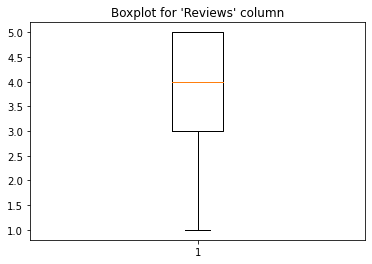

In [21]:
# Boxplot to check if there are any outliers in the 'Reviews' column 
plt.boxplot(data['Reviews'])
plt.title("Boxplot for 'Reviews' column")
plt.show()  # no outlier

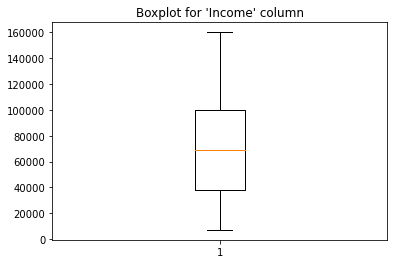

In [22]:
# Boxplot to check if there are any outliers in the 'Income' column 
plt.boxplot(data['Income'])
plt.title("Boxplot for 'Income' column")
plt.show()  # no outlier

In [24]:
# Replacing the missing values as per the discussion above
#For "Reviews" and "Income", we will replace the missing values by either mean or median because data is continuous.
#For delivery charges the missing vlue represents delivery charges which are zero
data["Delivery_chrgs"] = data["Delivery_chrgs"].fillna(0)
data["Income"] = data["Income"].fillna(data.median()['Income'])
data["Reviews"] = data["Reviews"].fillna(data.median()['Reviews'])

C:\Users\Hp\AppData\Local\Temp/ipykernel_5420/3406441792.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data["Income"] = data["Income"].fillna(data.median()['Income'])
C:\Users\Hp\AppData\Local\Temp/ipykernel_5420/3406441792.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data["Reviews"] = data["Reviews"].fillna(data.median()['Reviews'])


In [25]:
# No of missing values in each column of the dataset
data.isnull().sum()

Qty                0
Rate               0
Amount             0
Tax                0
Delivery_chrgs     0
Payment_mode       0
Store_type         0
Reviews            0
Income             0
Return             0
Gender             0
Level_Education    0
Type               0
prod_subcat        0
prod_cat           0
Month_name         0
City_Code_Name     0
dtype: int64

In [26]:
# Continuous variables
Continuous_variables = ["Qty", "Rate", "Amount", "Tax", "Delivery_chrgs", "Reviews", "Income"]

In [27]:
# categoricalvariables
Categorical_variables = ["Payment_mode", "Store_type", "Gender", "Level_Education", "Type", "prod_subcat", "prod_cat", "Month_name", "City_Code_Name"]

In [28]:
####OUTLIER TREATMENT
# Function to return outliers
def outlier_d(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

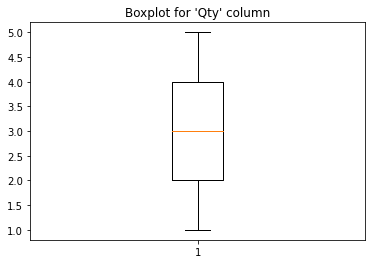

In [29]:
# Boxplot to check if there are any outliers 
plt.boxplot(data['Qty'])
plt.title("Boxplot for 'Qty' column")
plt.show()  # no outliers present

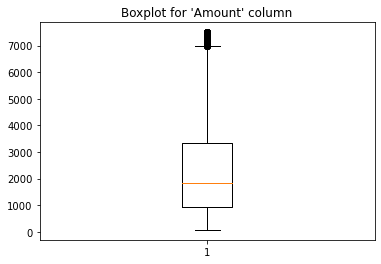

In [30]:
plt.boxplot(data['Amount'])
plt.title("Boxplot for 'Amount' column")
plt.show()  # Spositive outliers

In [31]:
outlier_data = outlier_d(data['Amount'])
print("Outliers for 'Amount' column are : ", outlier_data)#outlier treatment  

Outliers for 'Amount' column are :  []


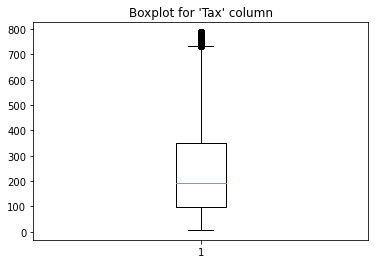

In [32]:
plt.boxplot(data['Tax'])
plt.title("Boxplot for 'Tax' column")
plt.show()  #  positive outliers

In [33]:
outlier_data = outlier_d(data['Tax'])
print("Outliers for 'Tax' column are : ", outlier_data) #outlier treatment

Outliers for 'Tax' column are :  []


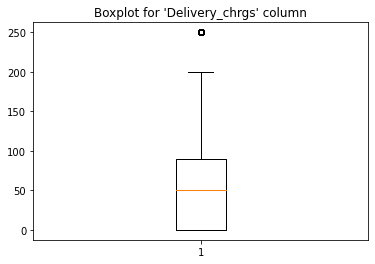

In [34]:
plt.boxplot(data['Delivery_chrgs'])
plt.title("Boxplot for 'Delivery_chrgs' column")
plt.show()  #  positive outlier

In [35]:
outlier_data = outlier_d(data['Delivery_chrgs'])
print("Outliers for 'Delivery_chrgs' column is : ", outlier_data) # outlier treatment

Outliers for 'Delivery_chrgs' column is :  []


In [24]:
## NO OUTLIERS PRESENT


In [38]:
###UNIVARIATE AND BIVARIATE ANALYSIS

# ANOVA test9continous-continuous variable)
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in Continuous_variables:
    model = ols(col + '~' + 'Return', data = data).fit() # Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print("Anova test results for", col)
    print(result_anova)
    print("\n")

Anova test results for Qty
               df        sum_sq      mean_sq            F         PR(>F)
Return        1.0   2852.446105  2852.446105  1467.000391  1.379971e-309
Residual  19595.0  38100.658860     1.944407          NaN            NaN


Anova test results for Rate
               df        sum_sq        mean_sq        F    PR(>F)
Return        1.0  9.591300e+05  959129.986108  5.58896  0.018084
Residual  19595.0  3.362728e+09  171611.518495      NaN       NaN


Anova test results for Amount
               df        sum_sq       mean_sq          F    PR(>F)
Return        1.0  4.425290e+07  4.425290e+07  14.582571  0.000135
Residual  19595.0  5.946383e+10  3.034643e+06        NaN       NaN


Anova test results for Tax
               df        sum_sq        mean_sq          F    PR(>F)
Return        1.0  4.878882e+05  487888.232385  14.582571  0.000135
Residual  19595.0  6.555888e+08   33456.941233        NaN       NaN


Anova test results for Delivery_chrgs
               df   

In [42]:
#If p<0.05, we will reject null hypothesis 
## Here for 'Delivery_chrgs' only, p > 0.05 so it means it is not corelted  and hence we will eliminate it

In [40]:
# Chi-square test (for categorical-categorical variable)
from scipy.stats import chi2_contingency

for col in Categorical_variables:
  chisqt = pd.crosstab(data['Return'], data[col], margins=True)
  value = np.array([chisqt.iloc[0][:chisqt.shape[1]-1].values,chisqt.iloc[1][:chisqt.shape[1]-1].values])
  print("p value for ",col," is",chi2_contingency(value)[1]) 
  print("\n")

p value for  Payment_mode  is 0.13792742784534948


p value for  Store_type  is 0.47157741935921227


p value for  Gender  is 0.985238325622347


p value for  Level_Education  is 0.1524414609078093


p value for  Type  is 0.2984738704415516


p value for  prod_subcat  is 3.715266889123837e-149


p value for  prod_cat  is 6.63597987102951e-37


p value for  Month_name  is 7.736102669571833e-206


p value for  City_Code_Name  is 0.2594154945905172




In [ ]:
#If p<0.05, we will reject null hypothesis.
# Here "City_Code_Name","Type","Level_Education","Gender","Store_type","Payment_mode" have p vale >0.05 thuus we elimante them as they are not corelated.

In [41]:
# Eliminating non-correlated variables
data = data.drop(columns = ["Delivery_chrgs","City_Code_Name","Type","Level_Education","Gender","Store_type","Payment_mode"])

In [42]:
print(data.columns) ## checking column names

Index(['Qty', 'Rate', 'Amount', 'Tax', 'Reviews', 'Income', 'Return',
       'prod_subcat', 'prod_cat', 'Month_name'],
      dtype='object')


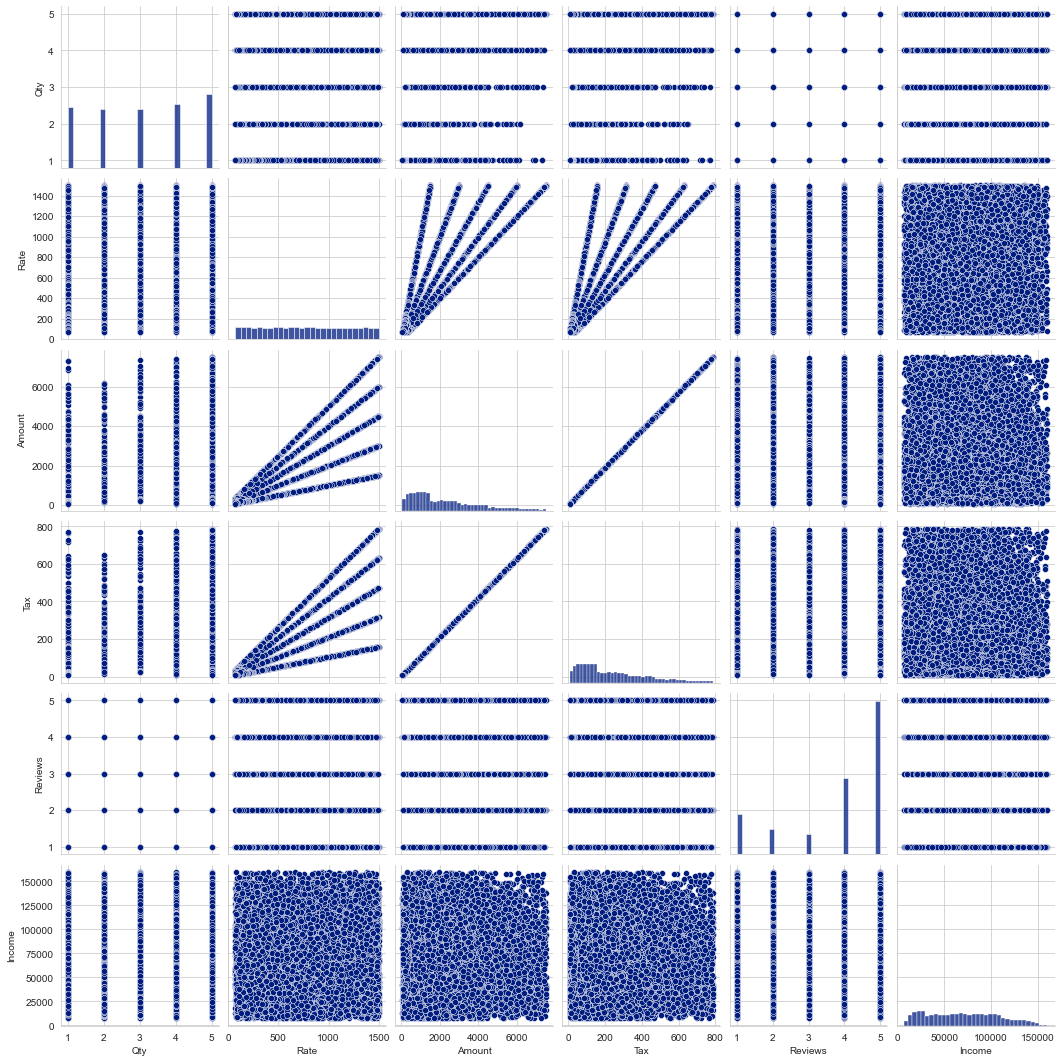

In [43]:
# Let's look at the pairplot for numerical variables
sns.set_palette("dark")
sns.set_style('whitegrid')
sns.pairplot(data[['Qty', 'Rate', 'Amount', 'Tax','Reviews', 'Income']])
plt.show()

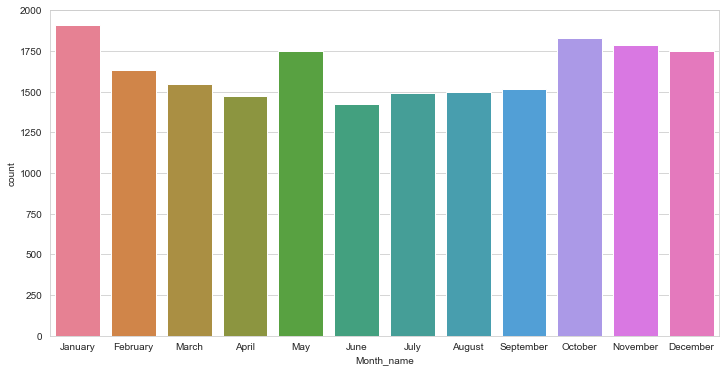

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Month_name', data = data, palette ='husl')
plt.show()

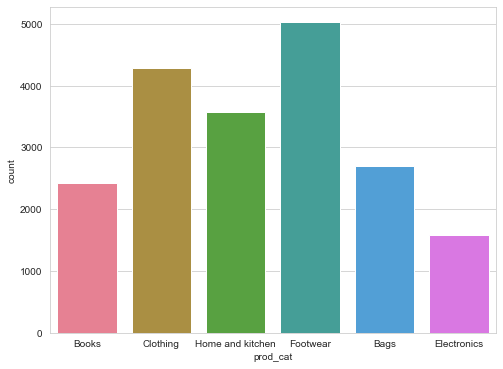

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x ='prod_cat', data = data, palette ='husl')
plt.show()

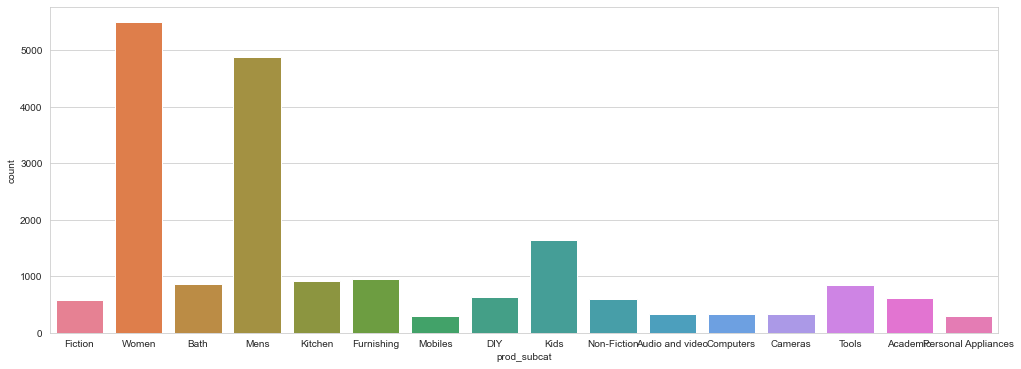

In [48]:
plt.figure(figsize=(17,6))
sns.countplot(x ='prod_subcat', data = data, palette ='husl')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# creating dummies for categorical variables
X_Dummies = pd.get_dummies(data[['prod_subcat', 'prod_cat', 'Month_name']])
X_Dummies.head()

,prod_subcat_Academic,prod_subcat_Audio and video,prod_subcat_Bath,prod_subcat_Cameras,prod_subcat_Computers,prod_subcat_DIY,prod_subcat_Fiction,prod_subcat_Furnishing,prod_subcat_Kids,prod_subcat_Kitchen,...,Month_name_December,Month_name_February,Month_name_January,Month_name_July,Month_name_June,Month_name_March,Month_name_May,Month_name_November,Month_name_October,Month_name_September
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
data = data.drop(columns=['prod_subcat', 'prod_cat', 'Month_name'])

In [52]:
# merging both dummies data for categorical var and the original data using pd.concat
dataset = pd.concat([data,X_Dummies],axis=1)

dataset.head()

,Qty,Rate,Amount,Tax,Reviews,Income,Return,prod_subcat_Academic,prod_subcat_Audio and video,prod_subcat_Bath,...,Month_name_December,Month_name_February,Month_name_January,Month_name_July,Month_name_June,Month_name_March,Month_name_May,Month_name_November,Month_name_October,Month_name_September
0,3,359,1795,188.475,1.0,67501.0,True,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1129,5645,592.725,1.0,102738.0,True,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,1327,6635,696.675,1.0,104013.0,True,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,5,1325,6625,695.625,4.0,92580.0,True,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,1237,6185,649.425,1.0,101763.0,True,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# categorical dependent variable which is "Return" contains TRUE and FALSE, so we can simply replace TRUE by 1 and FALSE by 0
dataset['Return'].replace({True :1, False :0}, inplace = True)

In [63]:
#### Creating the Independendent and Dependent Data Sets

# Feature or Independent variables
X= dataset.drop(["Return"],axis=1)

X.head()

,Qty,Rate,Amount,Tax,Reviews,Income,prod_subcat_Academic,prod_subcat_Audio and video,prod_subcat_Bath,prod_subcat_Cameras,...,Month_name_December,Month_name_February,Month_name_January,Month_name_July,Month_name_June,Month_name_March,Month_name_May,Month_name_November,Month_name_October,Month_name_September
0,3,359,1795,188.475,1.0,67501.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1129,5645,592.725,1.0,102738.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,1327,6635,696.675,1.0,104013.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,5,1325,6625,695.625,4.0,92580.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,1237,6185,649.425,1.0,101763.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
# Label or Dependent variable
y = dataset["Return"]

y

0        1
1        1
2        1
3        1
4        1
        ..
19592    1
19593    0
19594    0
19595    0
19596    0
Name: Return, Length: 19597, dtype: int64

In [77]:
## SMOTE over sampling to balance the training data

from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], random_state=0) 
columns = data_x.columns
X_resampled, y_resampled = smote_nc.fit_resample(X,y)
X = pd.DataFrame(data =  X_resampled, columns = columns )
y= pd.DataFrame(data = y_resampled, columns=['Return'])
y = y['Return']

In [78]:
# Splitting the data into training and test data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.30, random_state=0, )
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((24557, 40), (10525, 40), (24557,), (10525,))

In [80]:
##STANDARDISING DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x) 

In [84]:
X_test_scaled = scaler.transform(test_x)

In [85]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
# Predicting the Test (Test_Scaled) set results 
y_pred = classifier.predict(X_test_scaled)

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,y_pred)

confusion_matrix

array([[4500,  734],
       [ 358, 4933]], dtype=int64)

In [89]:
# various accuracy measures for a classification model
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled,test_y)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5234
           1       0.87      0.93      0.90      5291

    accuracy                           0.90     10525
   macro avg       0.90      0.90      0.90     10525
weighted avg       0.90      0.90      0.90     10525

Accuracy of logistic regression classifier on test set: 0.90


In [90]:
#MODEL stat
import statsmodels.api as sm

In [91]:
#Adding Intercept term to the model
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
#Printing the Model Statistics
model = sm.Logit(train_y,train_x).fit()
model.summary()

         Current function value: 0.081881
         Iterations: 35


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Return   No. Observations:                24557
Model:                          Logit   Df Residuals:                    24516
Method:                           MLE   Df Model:                           40
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.8819
Time:                        22:31:05   Log-Likelihood:                -2010.7
converged:                      False   LL-Null:                       -17022.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              95.5700   2.28e+06   4.18e-05      1.000   -4.48e+06    4.48e+06
Qty                                 1.0839      0.044     24.518      0.000       0.997       1.171
Rate                                0.0026      0.000     13.591      0.000       0.002       0.003
Amount                           -142.0501    131.607     -1.079      0.280    -399.994     115.894
Tax                              1352.8519   1253.397      1.079      0.280   -1103.761    3809.465
Reviews                            -1.1880      0.032    -37.552      0.000      -1.250      -1.126
Income                           7.442e-06    1.1e-06      6.780      0.000    5.29e-06    9.59e-06
prod_subcat_Academic              -32.7416        nan        nan        nan         nan         nan
prod_subcat_Audio and video         9.4162    164.184      0.057      0.954    -312.378     331.210
prod_subcat_Bath                  -25.3040   4.27e+05  -5.92e-05      1.000   -8.38e+05    8.38e+05
prod_subcat_Cameras                 8.9960    164.184      0.055      0.956    -312.799     330.791
prod_subcat_Computers              10.0625    164.183      0.061      0.951    -311.731     331.856
prod_subcat_DIY                   -31.1451        nan        nan        nan         nan         nan
prod_subcat_Fiction               -32.0699        nan        nan        nan         nan         nan
prod_subcat_Furnishing            -24.1890   4.27e+05  -5.66e-05      1.000   -8.38e+05    8.38e+05
prod_subcat_Kids                  -60.4489   2.28e+06  -2.65e-05      1.000   -4.48e+06    4.48e+06
prod_subcat_Kitchen               -24.4437   4.27e+05  -5.72e-05      1.000   -8.38e+05    8.38e+05
prod_subcat_Mens                  -60.3489   2.28e+06  -2.64e-05      1.000   -4.48e+06    4.48e+06
prod_subcat_Mobiles                11.0830    164.183      0.068      0.946    -310.710     332.876
prod_subcat_Non-Fiction           -31.9890        nan        nan        nan         nan         nan
prod_subcat_Personal Appliances    10.0901    164.184      0.061      0.951    -311.704     331.884
prod_subcat_Tools                 -25.1475   4.27e+05  -5.88e-05      1.000   -8.38e+05    8.38e+05
prod_subcat_Women                 -58.9761   2.28e+06  -2.58e-05      1.000   -4.48e+06    4.48e+06
prod_cat_Bags                     -17.8944   5199.495     -0.003      0.997   -1.02e+04    1.02e+04
prod_cat_Books                    -46.6794        nan        nan        nan         nan         nan
prod_cat_Clothing                 -18.4087   5199.495     -0.004      0.997   -1.02e+04    1.02e+04
prod_cat_Electronics              -88.3001   2.28e+06  -3.87e-05      1.000   -4.48e+06    4.48e+06
prod_cat_Footwear                 -18.5081   5199.495     -0.004      0.997   -1.02e+04    1.02e+04
prod_cat_Home and kitchen         -53.3334   2.33e+06  -2.29e-05      1.000   -4.56e+06    4.56e+06
Month_name_April                  -21.992

In [ ]:
#"Qty" and "Reviews"are the ones which will affect the decision of a product getting returned more than other parameters.